In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)

### The Dataset

The chosen dataset is called the [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227&sortBy=voteCount). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

### 1

We select median_house_value as the dependent variable and median_income as the independent variable. Firstly, we drop rows that have NaN values. Secondly, we turn the categorical variable ocean_priximity into numeric variable. Then, we plot the histograms of all variables, and find that there are outliers in housing_median_age and median_house_value. Therefore, these outliers are removed.Moreover, we make new variable per_bedrooms by by dividing the total number of bedrooms by the number of people. Finally, statistics are obtained for the two selected variables.

In [2]:
# Load in the CSV
df = pd.read_csv("Assignment2 data housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,NEAR BAY
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,NEAR BAY
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,NEAR BAY
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,NEAR BAY
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09000,39.48000,25.00000,1665.00000,374.00000,845.00000,330.00000,1.56030,78100.00000,INLAND
20636,-121.21000,39.49000,18.00000,697.00000,150.00000,356.00000,114.00000,2.55680,77100.00000,INLAND
20637,-121.22000,39.43000,17.00000,2254.00000,485.00000,1007.00000,433.00000,1.70000,92300.00000,INLAND
20638,-121.32000,39.43000,18.00000,1860.00000,409.00000,741.00000,349.00000,1.86720,84700.00000,INLAND


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
# drop rows that have NaN values
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [75]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [76]:
# turn categorical data into numeric data
df = pd.get_dummies(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,0,0,0,1,0
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,0,0,0,1,0
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,0,0,0,1,0
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,0,0,0,1,0
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09000,39.48000,25.00000,1665.00000,374.00000,845.00000,330.00000,1.56030,78100.00000,0,1,0,0,0
20636,-121.21000,39.49000,18.00000,697.00000,150.00000,356.00000,114.00000,2.55680,77100.00000,0,1,0,0,0
20637,-121.22000,39.43000,17.00000,2254.00000,485.00000,1007.00000,433.00000,1.70000,92300.00000,0,1,0,0,0
20638,-121.32000,39.43000,18.00000,1860.00000,409.00000,741.00000,349.00000,1.86720,84700.00000,0,1,0,0,0


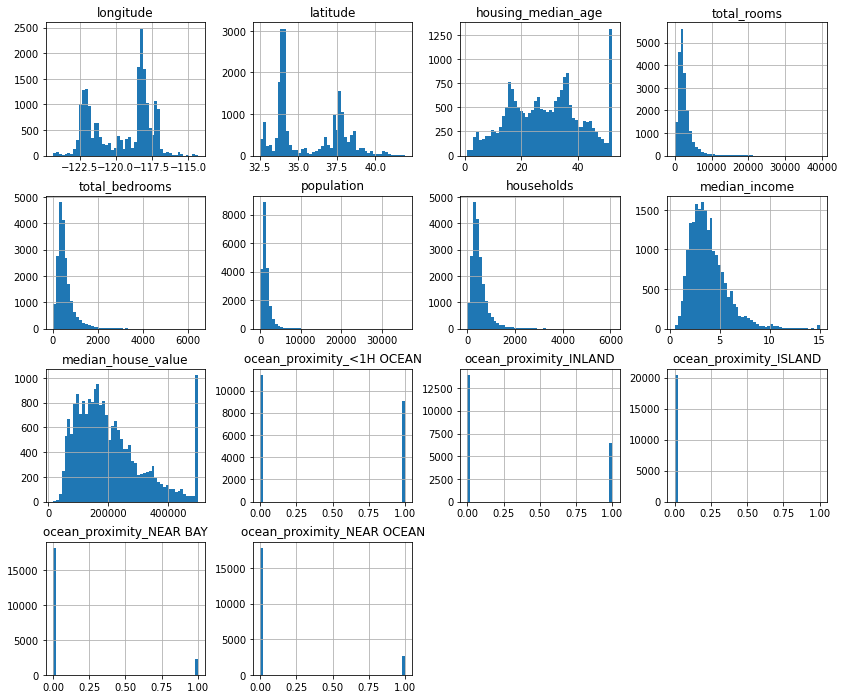

In [77]:
# look at data distribution
df.hist(bins=50, figsize=(14, 12))
plt.show()

As shown in above figure, we can find that there are outliers in housing_median_age and median_house_value. Therefore, we need to remove these outliers.

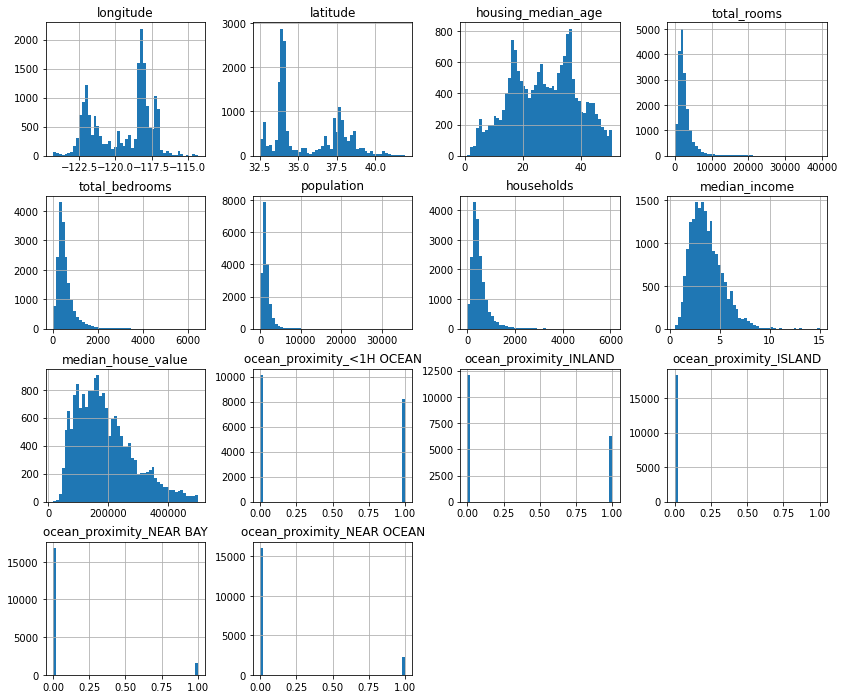

In [78]:
# remove outliers
max_price = df["median_house_value"].max()
max_age = df["housing_median_age"].max()
df = df[df["median_house_value"] != max_price]
df = df[df["housing_median_age"] != max_age]
df.hist(bins=50, figsize=(14, 12))
plt.show()

In [79]:
# make new variables
df["per_bedrooms"] = df["total_bedrooms"] / df["population"]

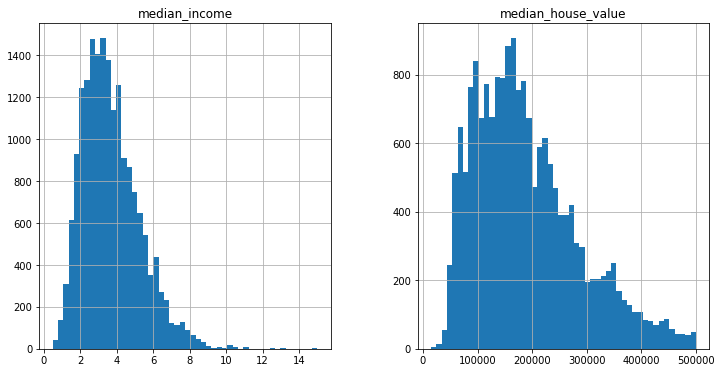

,median_income,median_house_value
count,18379.00000,18379.00000
mean,3.69370,189563.46901
std,1.56968,95763.62978
min,0.49990,14999.00000
25%,2.53700,115400.00000
50%,3.47050,171200.00000
75%,4.61670,243200.00000
max,15.00010,500000.00000


In [80]:
# summarise two numeric variables
selected_data= df[["median_income", "median_house_value"]]
selected_data.hist(bins=50, figsize=(12, 6))
plt.show()
selected_data.describe()

### 2

The higher the median income, the higher the median house price. The Pearson's coeffient between these two variables is 0.661, which means that there is positive correlation between the median income and median house price. Therefore, we can conclude that there is a linea relationship between these two variables.

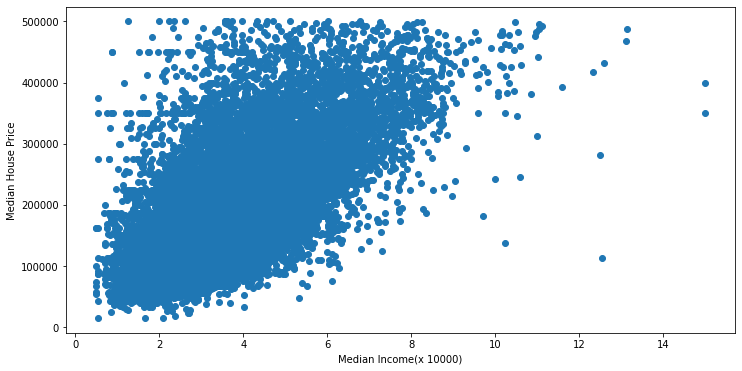

In [81]:
data = selected_data.values
x = data[:, 0]
y = data[:, 1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Median Income(x 10000)","Median House Price")

In [82]:
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.6610269024761716

### 3

We fit a simple linear model
``
Median House Price = 40328.28 * Median Income + 40602.96 + error
``

Therefore, we can say that starting at 40602.96, for every 1(x 10000) dollars increase in median income, the median house price rise by 40328.28 dollars.

We can make useful prediction by putting in new median income values and predicting the median house prices.

The r **<sup>2<sup>** of this linear model is 0.437, which means that the effect of model fitting is relatively modest.

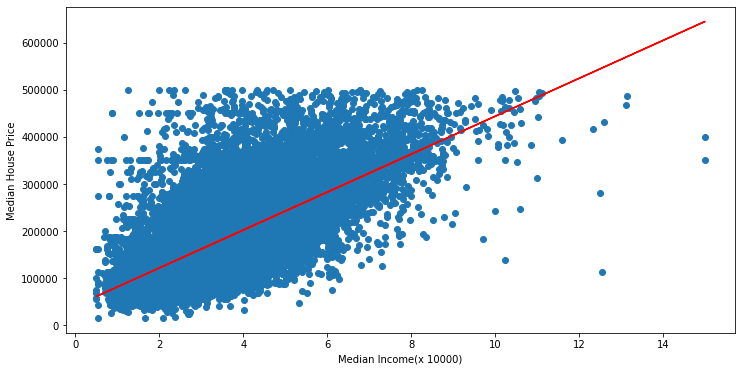

In [83]:
# fit a simple linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr_model = LinearRegression()
x = x.reshape(-1, 1)
regr_model.fit(x, y)
slope = regr_model.coef_[0]
intercept = regr_model.intercept_

model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Median Income(x 10000)","Median House Price")
ax.plot(x, model_y, "r")

In [84]:
# interpret model
slope, intercept

(40328.28393286076, 40602.96235267163)

In [85]:
# evalute
r = regr_model.score(x, y)
r

0.43695656579724396

### 4

We select housing_median_age, ocean_proximity_<1H OCEAN, ocean_proximity_INLAND and per_bedrooms as extra independent variables, and fit a multiple regression model.

The resulting coefficients and interpect means that from a starting point of 45842.7 dollars
* For every 1 year of housing_median_age, the median house price decreases 557.6 dollars.
* For every 1(x 10000) dollars of median incomde, the median house price increases 36696 dollars.
* If the ocean_proximity of the block is <1H OCEAN, the median house price decreases 7024 dollars.
* If the ocean_proximity of the block is INLAND, the median house price decreases  77750 dollars.

In [101]:
# fit multiple regression model
x = df[['housing_median_age', 
        'median_income',
        'ocean_proximity_<1H OCEAN',
        'ocean_proximity_INLAND',
        'per_bedrooms']]
y = df["median_house_value"]
multi_regr = LinearRegression()
multi_regr.fit(x, y) 
print(multi_regr.coef_, multi_regr.intercept_, ) 

[   557.59728819  36695.87053859  -7024.91660667 -77750.20410495
  45842.70388027] 50478.02160888005


In [102]:
# evaluate
r = multi_regr.score(x, y)
r

0.5845085004201482

### 5

We see no obvious ethical problem within house price prediction. And the data in the dataset is statistical and does not violate personal privacy.

We think that per capita housing area, local consumption level and traffic conditions are also key factors affecting housing prices.These data may improve our current models.